In [1]:
# @formatter:off
%load_ext autoreload
%autoreload 2
# @formatter:on

In [32]:
restart = []
heuristic = []

times = []
fitness = []

step_improved = []

step_times = []
step_counter = []

previous_step_amount = 1
previous_line = 'step'

# with open('../results/d1291_n1290_bounded-strongly-corr_01.ttp.100a69d2-ef44-4a30-9566-f8689a3e8163.flns.log') as file:
with open('../results/vm1748_n1747_bounded-strongly-corr_10.ttp.bd3d12a3-ca60-4a84-9e28-d1a2c7f8959b.flns.log') as file:
# with open('../results/dsj1000_n2997_uncorr-similar-weights_01.ttp.113b1393-960b-4c7f-9684-ad7a04a8ec06.flns.log') as file:
    for line in file:
        line_type = line[0:4]
        line = line.split()[1:]
        
        if line_type == 'fast' and previous_line != 'fast':
            restart.append(float(line[0]))
            
        if line_type == 'step':
            counter = int(line[1])
            previous_step_amount = int(line[2])
            step_amount = int(line[2]) + 1

            times[-1].append(float(line[0]))
            fitness[-1].append(fitness[-1][-1])

            if counter == 1000 and step_amount <= 5:
                step_times.append(float(line[0]))
                step_counter.append(step_amount)
                
        if line_type in ['fast', 'heur']:
            previous_step_amount = 1
            
            if not times or times[-1]:
                times.append([])
                fitness.append([])

        if line_type == 'heur':
            heuristic.append(float(line[0]))
            
            times[-1].append(float(line[0]))
            fitness[-1].append(float(line[1]))
        
        if line_type == 'impr':
            times[-1].append(float(line[0]))
            fitness[-1].append(float(line[1]))
            
            if previous_step_amount > 1:
                step_improved.append(float(line[0]))
                previous_step_amount = 1
            
        previous_line = line_type

step_improved

[]

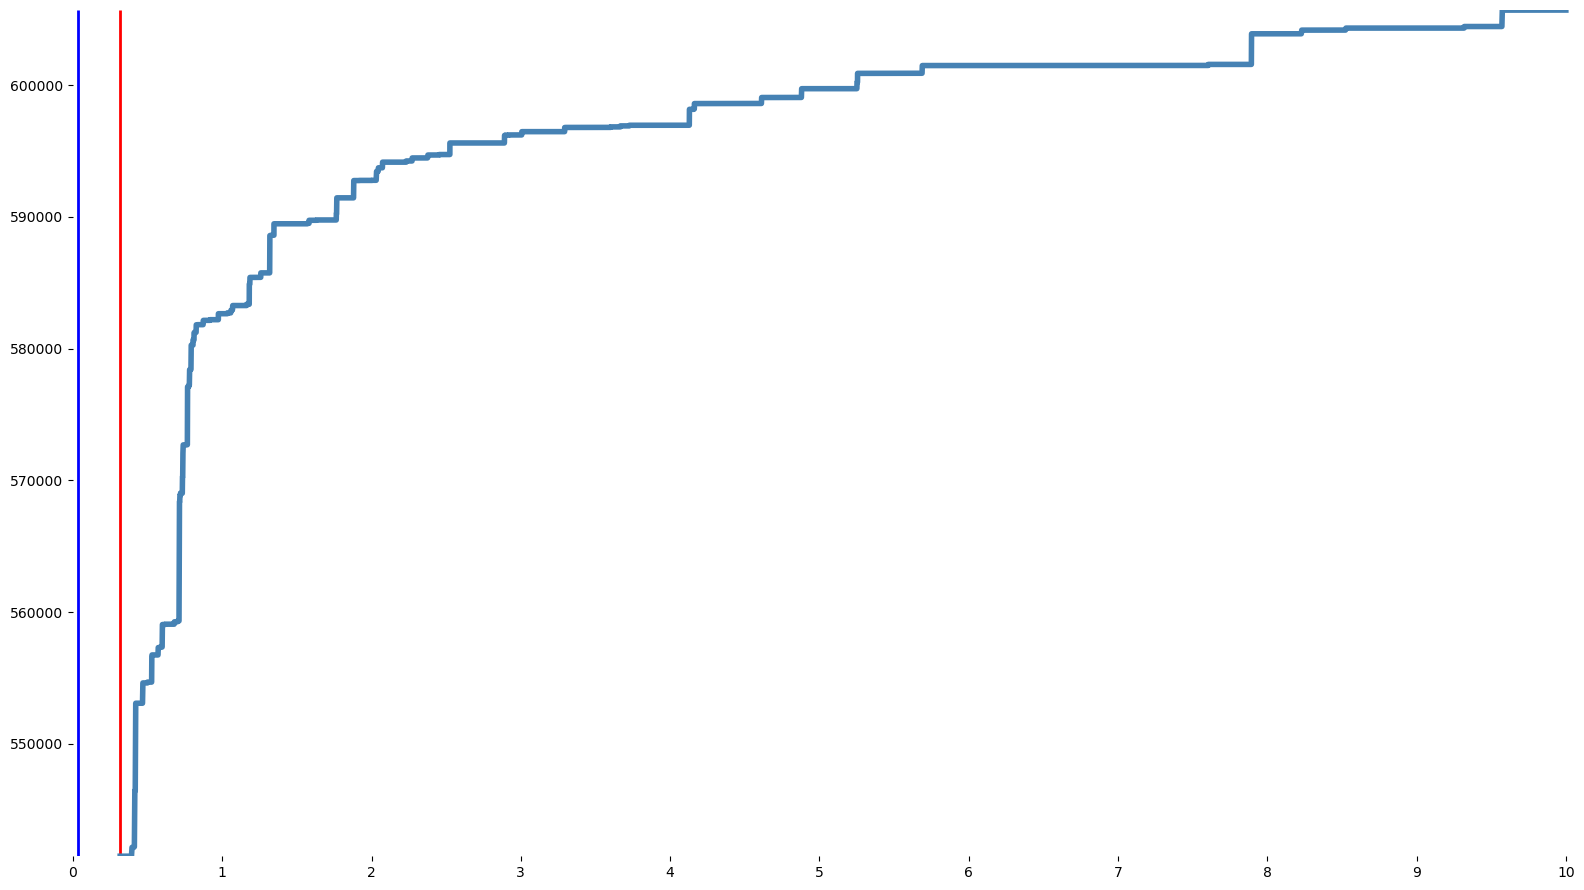

In [33]:
import matplotlib.pyplot as plt
import itertools

fitness_flat = list(itertools.chain(*fitness))
fitness_min = min(fitness_flat)
fitness_max = max(fitness_flat)

plt.figure(figsize=(16, 9))
plt.xlim((0, 602))
plt.ylim((fitness_min - 5, fitness_max + 5))
plt.tight_layout()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.vlines(restart, ymin=fitness_min, ymax=fitness_max, linewidth=2, colors='blue')
plt.vlines(heuristic, ymin=fitness_min, ymax=fitness_max, linewidth=2, colors='red')
plt.vlines(step_improved, ymin=fitness_min, ymax=fitness_max, linewidth=2, colors='green')
plt.vlines(step_times, ymin=fitness_min, ymax=fitness_max, linewidth=2, linestyles='dotted', colors='green')

for (t, f) in zip(times, fitness):
    plt.plot(t, f, color='steelblue', linewidth=4)

plt.xticks([60 * x for x in range(11)], range(11))

for (t, c) in zip(step_times, step_counter):
    plt.annotate(c, (t, fitness_max), textcoords='offset points', xytext=(-2.5,5))